# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

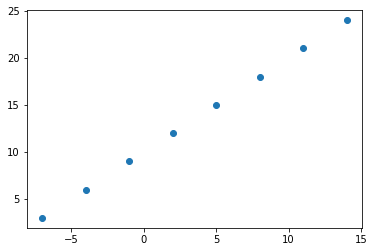

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)

In [3]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [4]:
# Cretae a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], Y[0]

(-7.0, 3.0)

In [7]:
X[1], Y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
 # Turn our numpy arrays into tensors
 X = tf.cast(tf.constant(X), dtype=tf.float32)
 Y = tf.cast(tf.constant(Y),dtype=tf.float32)
 X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

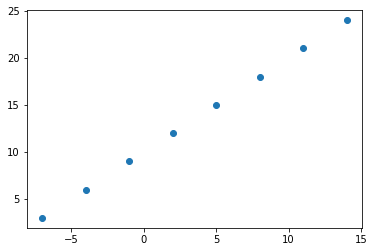

In [12]:
plt.scatter(X, Y)

## Steps in modeling with TensorFlow

1. **Creating a model** - Define the input and output layers, as well as the hidden layers of a Deep Learning model.

2. **Compile a model** - Define the loss function (in other words, the function wihch tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrices (what we can use to interpret the performance of our model).

3. **Fitting a model** - Letting the model try to find patterns between X and Y(features and model).

In [13]:
# Set reandom seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                             
])

# Compile the model
model.compile(loss=tf.keras.losses.mae # mae is short for Mean Absolute Error
              ,optimizer=tf.keras.optimizers.SGD() # sdg is short for stochastic gradient descent
              ,metrics=['mae']) 

# Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 558ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Check X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimazation function.

3. **Fit a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [16]:
# Let's rebuild our model

# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                                                         
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

In [17]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [19]:
# Let's see if we can improve our model even more.

# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),                             
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 357ms/step - loss: 13.9521 - mae: 13.9521
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.5549 - mae: 13.5549
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.1651 - mae: 13.1651
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7717 - mae: 12.7717
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3647 - mae: 12.3647
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9324 - mae: 11.9324
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4604 - mae: 11.4604
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9455 - mae: 10.9455
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3608 - mae: 10.3608
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6877 - mae: 9.6877
Epoch 11/100
1/1 [==============================] - 0s 9ms/

In [20]:
model.predict([17.0])

array([[32.654366]], dtype=float32)

In [21]:
# Let's see if we can improve our model even more.

# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),                             
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 374ms/step - loss: 11.9789 - mae: 11.9789
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9113 - mae: 10.9113
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8262 - mae: 9.8262
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7215 - mae: 8.7215
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5936 - mae: 7.5936
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1257 - mae: 7.1257
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5844 - mae: 7.5844
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.8105 - mae: 7.8105
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.9485 - mae: 7.9485
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.7162 - mae: 7.7162
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 

In [22]:
model.predict([17.0])

array([[27.198803]], dtype=float32)

In [23]:
# Let's see if we can improve our model even more.

# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),                             
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),                             
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 448ms/step - loss: 13.4856 - mae: 13.4856
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7349 - mae: 10.7349
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6027 - mae: 8.6027
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 5.4408 - mae: 5.4408
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 5.2617 - mae: 5.2617
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 6.2829 - mae: 6.2829
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 5.8664 - mae: 5.8664
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 4.7583 - mae: 4.7583
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 3.8154 - mae: 3.8154
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.5063 - mae: 4.5063
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 

In [24]:
model.predict([17.0])

array([[27.076826]], dtype=float32)

### Evalutating the model

In practice, a typical workflow you go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - What data are we working with? What does it look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground turths(the original labels).

In [25]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

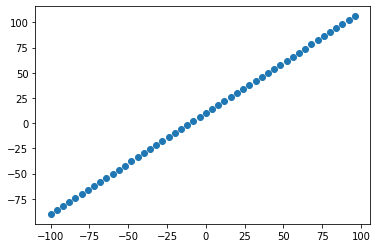

In [27]:
# Visualize the data
plt.scatter(X, Y)

In [28]:
# Check the length of how may many samples we have
len(X)

50

In [29]:
# Split the data into training and testing data sets

# Training data, first 40 are training samples (80% of the data)
X_train = X[:40]
Y_train = Y[:40]

# Testing data, last 10 are testing samples (20% of the data)
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

### Visualizing the data

Now we have got our data in training and test sets...let's visualize it again!

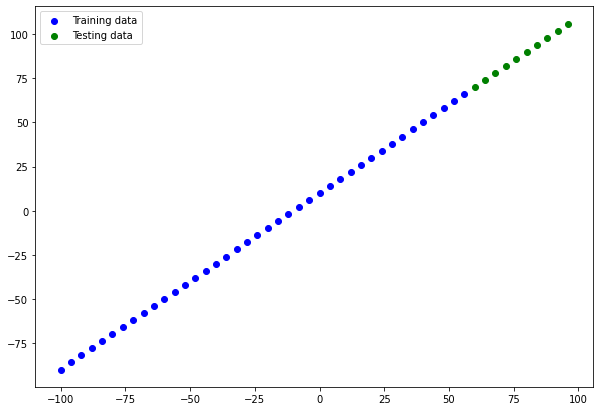

In [30]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, color='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, Y_test, color='g', label='Testing data')
# Show a legend
plt.legend();

In [31]:
# Let's build a neual network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(X_train, Y_train, epochs=100)

### Visualizing the model

In [33]:
model.summary()

ValueError: ignored

In [34]:
# Let's create a model which buillds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')

])

# compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [35]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameter**s - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring n already learned patterns or parameters from other models during **Transfer Learning**).

In [36]:
# Let's fit our model to the training data
model.fit(X_train, Y_train, epochs=100, verbose=0)

In [37]:
# Get a summary of our model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


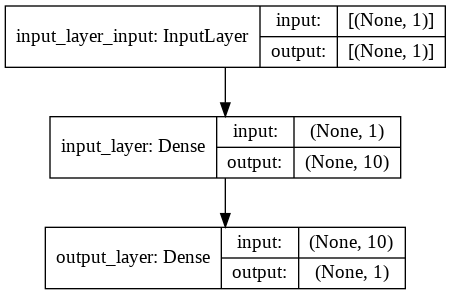

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

 ### Visualizing our model's predictions

 To visualize predictions, it's a good idea to plot them against the ground trught labels.

 Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (groudn truth versus your model's predictions).

In [44]:
# Make some predcitions
Y_pred = model.predict(X_test)
Y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [45]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # plot model's predictions in red
  plt.scatter(test_data, predictions, c='r')
  # show the legends
  plt.legend();

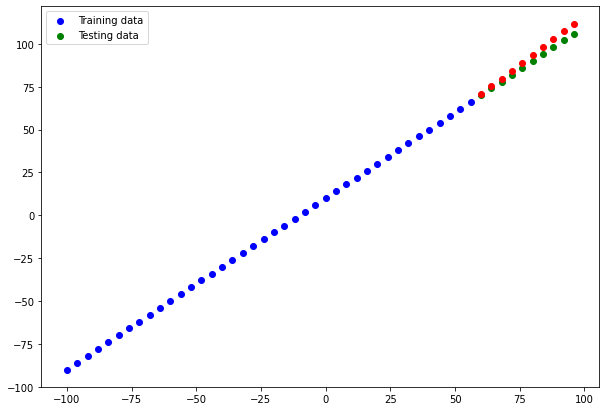

In [50]:
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of the main metrics are:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions are".
* MSE - mean squared error, "square the average errors".

In [51]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 138ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [56]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=Y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [57]:
Y_pred, tf.constant(y_pred)

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32)>)

In [58]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [59]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [63]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=Y_test, y_pred=tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [75]:
# Make some functions to resuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
 

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. **Make your model larger** (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. **Train for longer** - give your model more of a chance to find patterns in the data.


Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

In [76]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`**

In [77]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                               
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

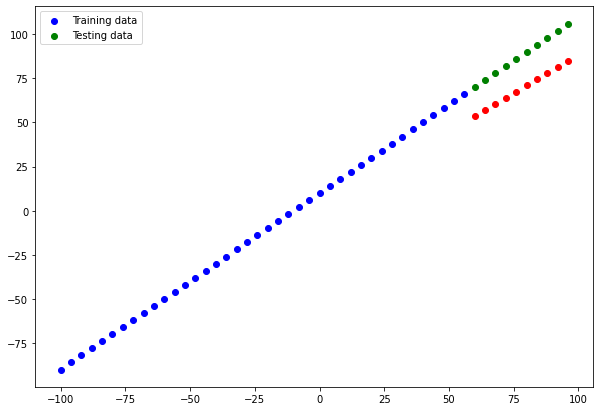

In [78]:
# Make and plot predictions for model 1
Y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_pred_1)

In [80]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, Y_pred_1)
mse_1 = mse(Y_test, Y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)


**Build `model_2`

* 2 dense layers, trained for 100 epochs

In [94]:
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                              
])

# Complile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 45.9963 - mse: 3227.4314
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 26.2701 - mse: 887.6888
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 31.0949 - mse: 1459.8684
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 29.1001 - mse: 1260.6611
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.7517 - mse: 325.4465
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4755 - mse: 201.3107
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 11.7266 - mse: 169.4787
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7829 - mse: 126.7498
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 36.5361 - mse: 2037.0232
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 24.3548 - mse: 830.5627
Epoch 11/100
2/2 [==========================

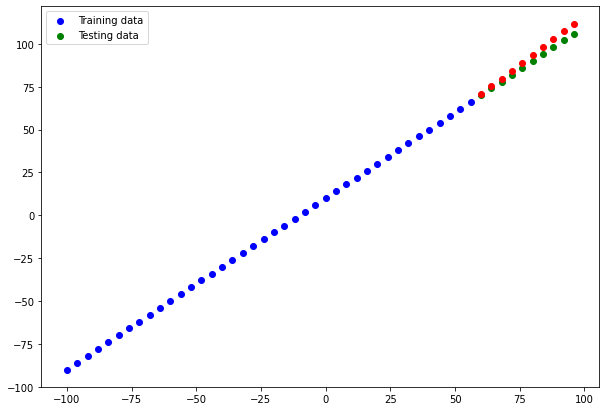

In [95]:
# Make and plot predictions of model_2
Y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_pred_2)

In [98]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, Y_pred_2)
mse_2 = mse(Y_test, Y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1489778>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.75584>)

** Build `model_3`

* 2 layers, trained for 500 epochs

In [106]:
# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# Complie the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(X_train, Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 25.1546 - mae: 25.1546
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 23.9781 - mae: 23.9781
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.9366 - mae: 29.9366
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 24.2284 - mae: 24.2284
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.3931 - mae: 14.3931
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4778 - mae: 11.4778
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.5053 - mae: 12.5053
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 10.9741 - mae: 10.9741
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 39.0045 - mae: 39.0045
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 26.5846 - mae: 26.5846
Epoch 11/500
2/2 [==============================] - 0s 4ms

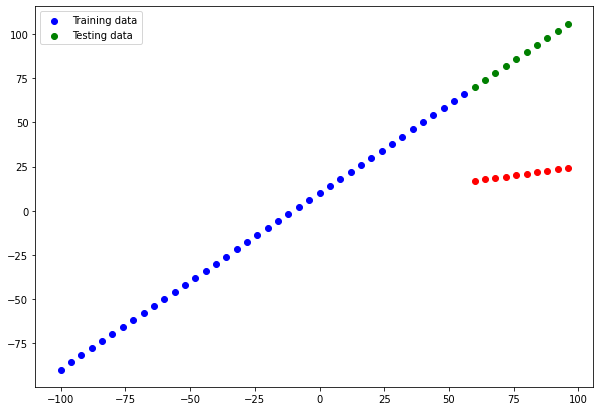

In [107]:
Y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_pred_3)

In [108]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, Y_pred_3)
mse_3 = mse(Y_test, Y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.42832>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4629.649>)

### Comparing the results of our experiments

We have run a few experiments, let's compare the results.